# Pandas

Knihovna pro práci se daty pomocí konceptu strukturované tabulky. 


Vlastnosti:
- Základem dvourozměrná tabulka. Typicky sloupce jsou pojmenované veličiny, řádky jsou indexy údajů.
- Snadný výběr, třídění a reorganizace tabulek.
- Interakce s úložišti dat: CSV, JSON, Excel, databáze
- Rychlá vizualizace.
- Vazba na statistické nástroje.


In [3]:
# POZOR: Nutno instalovat moduly:'xlwt', 'xlrd'
# Pro Excel export, import.

import matplotlib.pyplot as plt
import pandas as pd 

# statické grafy 
%matplotlib inline

## DataFrame

Základní datová struktura v Pandas, je `DataFrame`. Je to tabulka, která má pojmenované sloupce podle jednotlivých "veličin" a v řádcích jsou jednotlivá "pozorování". Vytvořme si tabulku jmen dětí s četností jejich používání (asi v Americe).

In [2]:
# The inital set of baby names and bith rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]
other = [0,1,2,3,4]

# We need lines of the table as tuples:
table = list(zip(names, births, other))
table

[('Bob', 968, 0),
 ('Jessica', 155, 1),
 ('Mary', 77, 2),
 ('John', 578, 3),
 ('Mel', 973, 4)]

In [3]:
# Create the data frame
df = pd.DataFrame(data = table, columns=['Names', 'Births', 0])
df

,Names,Births,0
0,Bob,968,0
1,Jessica,155,1
2,Mary,77,2
3,John,578,3
4,Mel,973,4


Libovolný sloupec lze použít jako index.

In [4]:
df_by_names = df.set_index('Names')
#print(df_by_names)
from IPython.display import display
display(df_by_names)

# Original dataframe unchanged.
df

,Births,0
Names,,
Bob,968,0
Jessica,155,1
Mary,77,2
John,578,3
Mel,973,4


,Names,Births,0
0,Bob,968,0
1,Jessica,155,1
2,Mary,77,2
3,John,578,3
4,Mel,973,4


## Indexování

Hranaté závorky vybírají sloupce. 

In [6]:
# Jeden index / název sloupce.
df['Names']

0        Bob
1    Jessica
2       Mary
3       John
4        Mel
Name: Names, dtype: object

In [7]:
df.Names

0        Bob
1    Jessica
2       Mary
3       John
4        Mel
Name: Names, dtype: object

In [8]:
# I číselný label vybírá sloupec.
df[0]

0    0
1    1
2    2
3    3
4    4
Name: 0, dtype: int64

Hranaté závorky obsahující slice vybírají řádky. 

In [11]:
# První 2 řádky.
df[0:2]

,Names,Births,0
0,Bob,968,0
1,Jessica,155,1


[`.iloc[...]`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)
Obecný výběr pomocí indexů.

In [12]:
# První dva řádky; sloupce 0 a 2
df.iloc[0:2, [0,2]]

,Names,0
0,Bob,0
1,Jessica,1


[`.loc[...]`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)
Obecný výběr pomocí názvů sloupců/řádků (label).

In [14]:

# První dva řádky; sloupce 0 a 2
df.loc[0:2,['Names', 'Births']]

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77


### Otázka
**Jaký problém může být s výběrem pomocí názvů (labels)?**

In [18]:
df2 = df.append({'Names':'Bob', 'Births':10, 0:5}, ignore_index=True)
print(df2)
df2 = df2.set_index('Names')
print(df2)

# Podvýběr z tabulky, pro duplicitní jméno Bob
print(df2.loc['Bob', :])
df2.reset_index()

df2 = df.append({'Names':None, 'Births':11, 0:5}, ignore_index=True)
df2

     Names  Births  0
0      Bob     968  0
1  Jessica     155  1
2     Mary      77  2
3     John     578  3
4      Mel     973  4
5      Bob      10  5
         Births  0
Names             
Bob         968  0
Jessica     155  1
Mary         77  2
John        578  3
Mel         973  4
Bob          10  5
       Births  0
Names           
Bob       968  0
Bob        10  5


,Names,Births,0
0,Bob,968.0,0.0
1,Jessica,155.0,1.0
2,Mary,77.0,2.0
3,John,578.0,3.0
4,Mel,973.0,4.0
5,NaN,11.0,5.0


## IO operace
Klíčové pro práci s daty je jejich načtení a zápis z různých formátů. Vytvořená data zapíšeme a poté načteme.

In [20]:
# Write the dataframe into CSV file.
# Add column with line index.
# Write column header at the first row.
df2.to_csv('births1880.csv', index=True, header=True, na_rep='NaN')

# Other instance without index and header.
df2.to_csv('births_raw.csv', index=False, header=False)

In [30]:
import os
current_dir = os.getcwd()
print(current_dir)

# Reading with full path, should not be necessary.
#path =  os.path.join(current_dir, 'births1880.csv')
#new_df = pd.read_csv(path)


new_df = pd.read_csv('births_raw.csv', header=None, names=['A', 'B','C'])
new_df


/home/jb/Vyuka/PAV_course


,A,B,C
0,Bob,968.0,0.0
1,Jessica,155.0,1.0
2,Mary,77.0,2.0
3,John,578.0,3.0
4,Mel,973.0,4.0
5,NaN,11.0,5.0


In [31]:
# Enable pretty display of Pandas tables


# Set own column names
new_df_full = pd.read_csv('births1880.csv', header=0,  index_col=0)
# Just text print, not so nice.
print(new_df_full)

# When no header, we have to tell it. Try both version.
#new_df = pd.read_csv('births_raw.csv')
new_df = pd.read_csv('births_raw.csv', header=None, names= ['name', 'freq', 'i'])

# Get nice table display.
from IPython.display import display
display(new_df)

     Names  Births    0
0      Bob   968.0  0.0
1  Jessica   155.0  1.0
2     Mary    77.0  2.0
3     John   578.0  3.0
4      Mel   973.0  4.0
5      NaN    11.0  5.0


,name,freq,i
0,Bob,968.0,0.0
1,Jessica,155.0,1.0
2,Mary,77.0,2.0
3,John,578.0,3.0
4,Mel,973.0,4.0
5,NaN,11.0,5.0


## Other IO functions

[Přehled](https://pandas.pydata.org/pandas-docs/stable/io.html) s oficiální dokumentace. 
Zejména formáty: 
- CSV - comma separate values, ale možné i jiné separátory, textový formát tabulky
- JSON - hierarchický formát, řeší escapování řeťezců, stále textový formát
- MS Excel - binární proprietární, velmi nevhodný pro práci s velkými daty, velmi vhodný pro interaktivní práci s malými daty, podpora pro různé verze Excel formátů
- HDF5 - otevřený binární formát navržený pro velká data
- SAS - nativní formát velmi používaného statistického balíku
- SQL - databáze


 

In [32]:
## Sorting

# Get first two names with highest frequency.
sorted_df = new_df.sort_values('freq', ascending=False)

# head() and tail() methods
display(sorted_df.head(5))

# Slices works as well.
display(sorted_df[:2])


,name,freq,i
4,Mel,973.0,4.0
0,Bob,968.0,0.0
3,John,578.0,3.0
1,Jessica,155.0,1.0
2,Mary,77.0,2.0


,name,freq,i
4,Mel,973.0,4.0
0,Bob,968.0,0.0


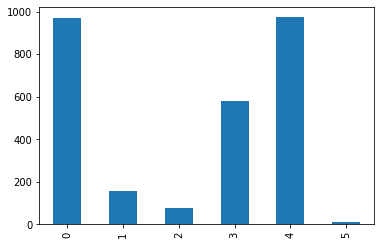

In [35]:
## Simple plotting

# See that we can index columns and rows by their names.
new_df['freq'].plot.bar()
plt.show()

,freq,i
name,,
Bob,968.0,0.0
Jessica,155.0,1.0
Mary,77.0,2.0
John,578.0,3.0
Mel,973.0,4.0
NaN,11.0,5.0


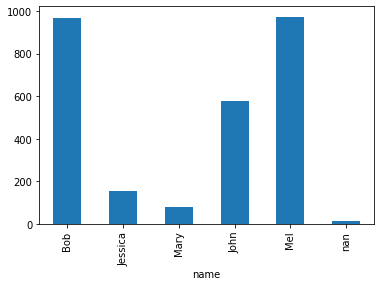

In [36]:
## Works better when we set names to rows by settign the row index.

name_df = new_df.set_index('name')
display(name_df)
name_df['freq'].plot.bar()
plt.show()

## More complex data processing example
First prepare a data frame with random data.

In [101]:
import numpy as np

# set seed
np.random.seed(111)

# Function to generate test data
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create random dates.
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='D')        
        rng = np.random.choice(rng, 100)        
        
        # Create random data
        count = np.random.randint(low=25,high=1000,size=len(rng))
        
        # Mark pool
        mark = [0,1,2,3]
        
        # Make a random list of statuses
        random_mark = np.random.choice(np.array(mark), size = len(rng))
                        #[status[np.random.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        states = ['GA','FL','fl','NY','NJ','TX']
        
        # Make a random list of states 
        random_states = np.random.choice(np.array(states), size = len(rng))
                        #[states[np.randint(low=0,high=len(states))] for i in range(len(rng))]
    
        Output.extend(zip(random_states, random_mark, count, rng))
        
    return Output



In [102]:
dataset = CreateDataSet(4)

r_df = pd.DataFrame(data=dataset, columns=['State','Mark','CustomerCount','StatusDate'])
r_df.info()
print("---")
r_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   State          400 non-null    object        
 1   Mark           400 non-null    int64         
 2   CustomerCount  400 non-null    int64         
 3   StatusDate     400 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 12.6+ KB
---


,State,Mark,CustomerCount,StatusDate
0,TX,0,798,2011-05-27
1,FL,2,515,2010-12-26
2,fl,1,135,2009-03-28
3,NJ,3,941,2012-07-23
4,FL,2,544,2010-11-13


## Excel IO

In [39]:
 {PE_warnings} ~/workspace/flow123d$ sudo pip3 install xlwt
[sudo] password for jb: 
WARNING: The directory '/home/jb/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
WARNING: The directory '/home/jb/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
Collecting xlwt
  Downloading https://files.pythonhosted.org/packages/44/48/def306413b25c3d01753603b1a222a011b8621aed27cd7f89cbc27e6b0f4/xlwt-1.3.0-py2.py3-none-any.whl (99kB)
     |████████████████████████████████| 102kB 3.9MB/s 
Installing collected packages: xlwt
Successfully installed xlwt-1.3.0
WARNING: You are using pip version 19.3.1; however, version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
 {PE_warnings} ~/workspace/flow123d$ ^C
 {PE_warnings} ~/workspace/flow123d$ 




SyntaxError: invalid syntax (2953362441.py, line 1)

In [4]:
# POZOR: Nutno instalovat moduly:'xlwt', 'xlrd'

file_name = 'customer_reports.xlsx'
#r_df.to_excel(file_name, index=False)
#print('Data exported.')

# Parse a specific sheet 0
df = pd.read_excel(file_name)
#df.reset_index(inplace=True)

print("Colum types:")
print(df.dtypes)

df.head()

# TODO: show read from google calc


Colum types:
State                    object
Mark                      int64
CustomerCount             int64
StatusDate       datetime64[ns]
dtype: object


,State,Mark,CustomerCount,StatusDate
0,TX,0,798,2011-05-27
1,FL,2,515,2010-12-26
2,fl,1,135,2009-03-28
3,NJ,3,941,2012-07-23
4,FL,2,544,2010-11-13


## Prepare data
This section attempts to clean up the data for analysis.

1. Make sure the state column is all in upper case
2. Only select records where the mark is valid: 1,2,3
3. Merge (NJ and NY) to NY in the state column
4. Remove any outliers (any odd results in the data set)


In [46]:
# See what states we have.... Of course 'fl' should be 'FL'.
df['State'].unique()

array(['TX', 'FL', 'fl', 'NJ', 'NY', 'GA'], dtype=object)

In [48]:
# Clean State Column, convert to upper case
def to_upper(x):
    return x.upper()

df['State'] = df['State'].apply(to_upper)
print(df['State'].unique())
df.head()

['TX' 'FL' 'NJ' 'NY' 'GA']


,State,Mark,CustomerCount,StatusDate
0,TX,0,798,2011-05-27
1,FL,2,515,2010-12-26
2,FL,1,135,2009-03-28
3,NJ,3,941,2012-07-23
4,FL,2,544,2010-11-13


In [49]:
df['Mark'].unique()

array([0, 2, 1, 3])

In [52]:
df['Mark']
df['Mark'] > 0
df[df['Mark'] > 0]

,State,Mark,CustomerCount,StatusDate
1,FL,2,515,2010-12-26
2,FL,1,135,2009-03-28
3,NJ,3,941,2012-07-23
4,FL,2,544,2010-11-13
6,NY,2,924,2009-04-29
...,...,...,...,...
394,GA,1,271,2011-08-30
395,FL,2,707,2009-05-22
396,NJ,1,202,2009-05-04
398,NJ,1,107,2012-08-11


In [89]:
# Only grab where Mark in [1,2,3]
mask = df['Mark'] in [1,2,3]    # Error since 'in' has ambiguous operands.


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [58]:
# Only grab where Mark in [1,2,3]
#display(df.head())
#df.set_index('StatusDate')['Mark']
mask = df['Mark'].isin([1,2,3])
#mask
df1 = df[mask]
df1.head()

,State,Mark,CustomerCount,StatusDate
1,FL,2,515,2010-12-26
2,FL,1,135,2009-03-28
3,NJ,3,941,2012-07-23
4,FL,2,544,2010-11-13
6,NY,2,924,2009-04-29


In [64]:
# Convert NJ to NY
mask = df1.State == 'NJ'

# This produce a warnning as there is chained indexing.
#df1['State'][mask] = 'NY'

# This should be correct equivalent.
df1.loc[mask, 'State'] = 'NY'



df1['State'].unique()

array(['FL', 'NY', 'TX', 'GA'], dtype=object)

StatusDate
2011-05-27    798
2010-12-26    515
2009-03-28    135
2012-07-23    941
2010-11-13    544
             ... 
2009-05-22    707
2009-05-04    202
2012-08-25    552
2012-08-11    107
2010-05-11    190
Name: CustomerCount, Length: 400, dtype: int64

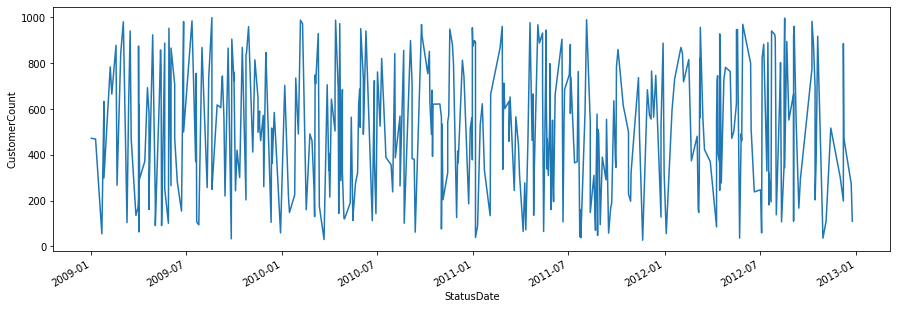

In [71]:
df.reset_index(inplace=True)
df.set_index('StatusDate', inplace=True)
count = df['CustomerCount']

display(count)
count.plot(figsize=(15,5), ylabel=count.name);

#plt.show()

In [73]:
# Reset index, to have StatusDate as regular column.
df_a = df.reset_index()
display(df_a.head())

# Group by State and StatusDate, sum rows with same index.
display(df_a.groupby(['State','StatusDate']))
Daily = df_a.groupby(['State','StatusDate']).mean()
display(Daily)
Daily['Mark'].unique()



,StatusDate,State,Mark,CustomerCount
0,2011-05-27,TX,0,798
1,2010-12-26,FL,2,515
2,2009-03-28,FL,1,135
3,2012-07-23,NJ,3,941
4,2010-11-13,FL,2,544


Mark  CustomerCount
State StatusDate                     
FL    2009-01-22   0.0           55.0
      2009-02-18   2.0          878.0
      2009-02-27   2.0          842.0
      2009-03-11   3.0          104.0
      2009-03-14   3.0          605.0
...                ...            ...
TX    2012-10-16   2.0          372.0
      2012-10-19   3.0          918.0
      2012-12-01   2.0          302.0
      2012-12-07   2.0          198.0
      2012-12-22   0.0          273.0

[387 rows x 2 columns]

array([0. , 2. , 3. , 1. , 1.5, 2.5, 0.5])

In [99]:
# Group by State and StatusDat, use both max ans um aggregation
#display(df_a)
        
Daily = df_a.groupby(['State']).agg([np.sum, np.max])
display(Daily.head())

# Group by State and StatusDat, use max for Status, sum for Count
Daily = df_a.groupby(['State','StatusDate']) \
        .agg({'Mark':np.max, 'CustomerCount':np.sum})
display(Daily.head())


Mark      CustomerCount     
       sum amax           sum amax
State                             
FL     208    3         61567  988
GA      88    3         37263  985
NJ     111    3         34831  999
NY     105    3         33768  990
TX     103    3         36806  988

Mark  CustomerCount
State StatusDate                     
FL    2009-01-22     0             55
      2009-02-18     2            878
      2009-02-27     2            842
      2009-03-11     3            104
      2009-03-14     3            605

<AxesSubplot:title={'center':'CustomerCount'}, xlabel='State'>

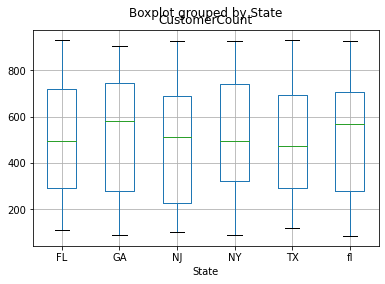

In [8]:
# Removing outliers 

# 1. create a mask
import numpy as np
import scipy.stats as st

st.zscore(df.CustomerCount)
mask = np.abs(st.zscore(df.CustomerCount)) < 1.5
np.sum(mask)

# unfortunately no standard function for IQR method
# use np.percentile
Q1, Q3 = np.percentile(df.CustomerCount , [25,75])
# ...

#2. extract masked
df[mask].boxplot(column='CustomerCount', by='State')

<AxesSubplot:title={'center':'CustomerCount'}, xlabel='State'>

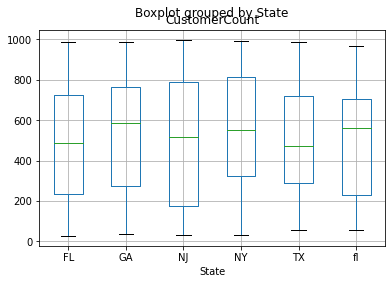

In [9]:
# original DF boxplots
df.boxplot(column='CustomerCount', by='State')

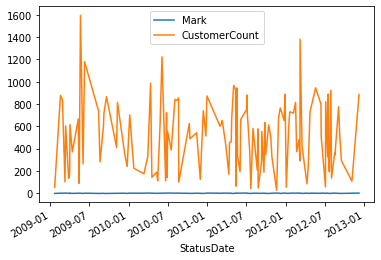

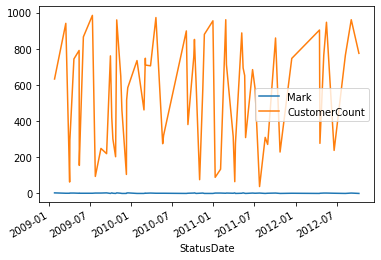

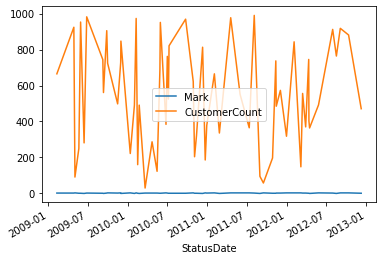

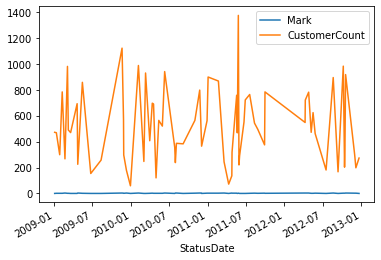

In [81]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot();
plt.show()


# Seaborn - high level statistical plotting

,group,value,count,size
0,A,17.656523,500,20.0
1,A,11.082982,500,20.0
2,A,12.456389,500,20.0
3,A,4.566826,500,20.0
4,A,9.132154,500,20.0


<AxesSubplot:title={'center':'value'}, xlabel='group'>

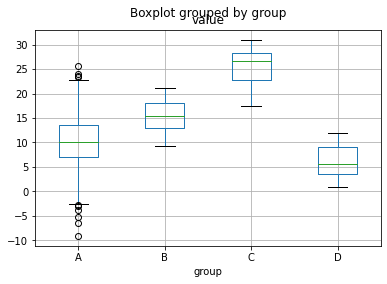

In [10]:
import pandas as pd

# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500), 'count': 500 })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500), 'count': 500 })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500), 'count': 500 })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20), 'count': 20 })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100), 'count': 100 })
df=a.append(b).append(c).append(d).append(e)
df['size'] = df['count'] / 25 
display(df.head())

# Pandas boxplot
#dfs = df.set_index('State')
#display(dfs)
df.boxplot(column='value', by='group')


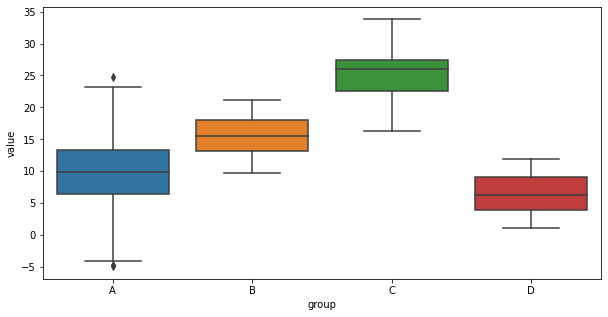

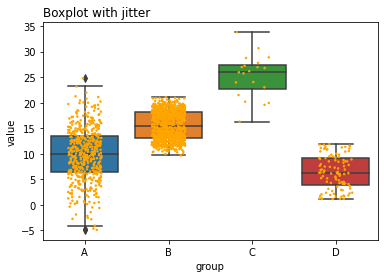

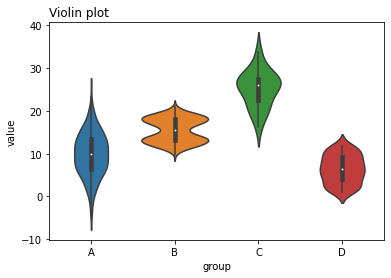

In [98]:
# libraries and data
import seaborn as sns

 

# Seaborn Usual boxplot
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
sns.boxplot(data=df, x='group', y='value')
plt.show()

# Box plot with jitter.
# outlier detection 
ax = sns.boxplot(x='group', y='value', data=df)
ax = sns.stripplot(x=df['group'], y='value', data=df, color="orange", jitter=0.2, size=2.5)
plt.title("Boxplot with jitter", loc="left")
plt.show()

# Violin plot.
sns.violinplot( x='group', y='value', data=df)
plt.title("Violin plot", loc="left")
plt.show()

# Excercise with diamonds
Pro následující operace vytvářejte pokud možno nové dataframy, ponechte vstupní DF v původním stavu.

- pro každý soupec určete datový typ
- pro sloupce typu 'str' určete množinu hodnot
- vytvořte dataframe s vymazanými řádky s barvou 'G'
- setřiďte dataframe sestupně podle ceny
- vypište diamanty se všemi rozměry >5
- vytvořte tabulku s 'cut' v řádcích a 'clarity' ve sloupcích, pro každou kombinaci (skupinu)
  vypočtěte počet diamantů ve skupině a medián jejich ceny
- pro každý datový sloupec vytvořte box plot s vyznačenými odlehlými pozorováními (outliers)
- odstraňte odlehlá pozorování (zejména: table, x, y, z)
- zobrazte a následně odstraňte duplicitní řádky


In [ ]:
# Get the diamonds dataset
import pandas as pd
diamonds = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')
print(diamonds)